## Loan Prediction

### problem statement
##### Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

importing various libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing altair for better visualisation
import altair as alt

In [4]:
#this statement is needed for running altair in the notebook
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [5]:
#reading the data through pandas library
data=pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [6]:
#showing the first five rows of the dataframe
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.shape

(614, 13)

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
data.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

>total no of rows=614 but many columns don't have that much values which means that there are many NaN values which needs to be fixed

In [10]:
data.groupby('Education').count()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Education,,,,,,,,,,,,
Graduate,480,468,477,469,454,480,480,465,472,443,480,480
Not Graduate,134,133,134,130,128,134,134,127,128,121,134,134


#### let's do some visualisation to get insights about the data

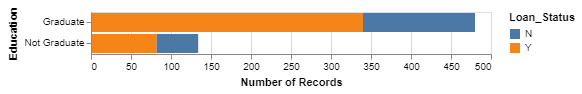

In [11]:
alt.Chart(data).mark_bar().encode(
y='Education',
x='count()' ,
color='Loan_Status'   
)

>the above plot shows that there are only two category graduate and not_graduate and also that how distribution of loan_approval to graduate and not_graduate section.

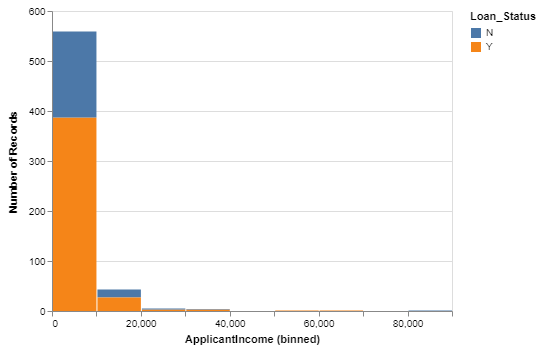

In [30]:
alt.Chart(data).mark_bar().encode(
x=alt.X('ApplicantIncome',bin=True),
y='count()',
color='Loan_Status'    
).interactive()

the above plot shows that most of the loan applicant lies in the range of below 10000 income. 

In [50]:
k=data.loc[(data.ApplicantIncome<=10000),:]
l=data.loc[(data.ApplicantIncome>10000),:]

In [51]:
k.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [52]:
applicants=k.shape
applicants

(562, 13)

out of 614 applicant 562 applicants have income less than 10000 which is quite obvious.

In [43]:
loan_approved=k.loc[(data.Loan_Status=='Y'),:].shape
loan_approved

(387, 13)

In [46]:
percentage=(387/562)*100
percentage

68.86120996441281

about 69% applicants in the income range 10000 have their loan approved

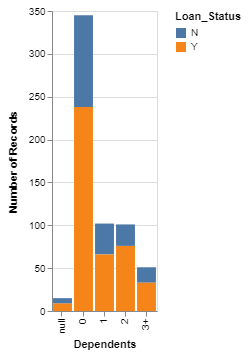

In [60]:
alt.Chart(data).mark_bar().encode(
x='Dependents',
y='count()',
color='Loan_Status'    
)

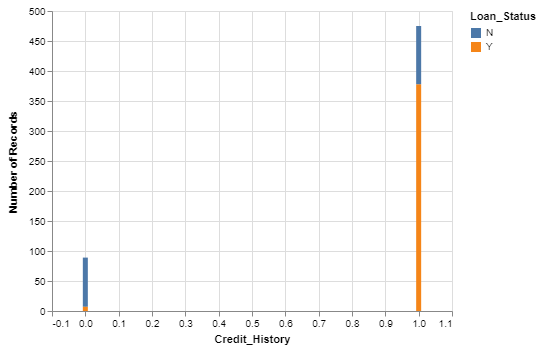

In [61]:
alt.Chart(data).mark_bar().encode(
x='Credit_History',
y='count()',
color='Loan_Status'    
)

the above plot shows that applicants having credit_history as 1 are more likely to get loan approval on the other hand applicants having credit_history as 0 are less likely to get the loan approval.
thus credit_history seems to be an important feature in deciding wheather or not an applicant loan_application can be approved or not

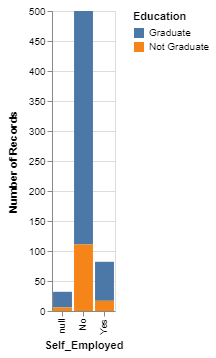

In [63]:
alt.Chart(data).mark_bar().encode(
x='Self_Employed',
y='count()',
color='Education'    
)

maximum number of loan_applicants are unemployed graduates

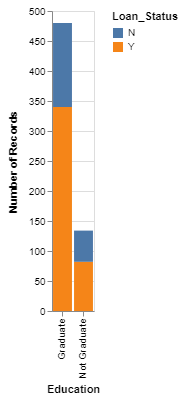

In [64]:
alt.Chart(data).mark_bar().encode(
x='Education',
y='count()',
color='Loan_Status'    
)

In [69]:
gradu_applied=data.loc[(data.Education=='Graduate'),:].shape
gradu_approved=data.loc[(data.Education=='Graduate') & (data.Loan_Status=='Y'),:].shape
print(gradu_approved)
print(gradu_applied)

(340, 13)
(480, 13)


In [72]:
percent_graduate_approved=(340/480)*100
percent_graduate_approved

70.83333333333334

thus approx 71% of the graduates have their loan_approved

In [13]:
#the non_numeric column like education property_area and loan_status needs to be converted into numeric column 
#and we will also have to deal with pandas NaN quqntity
pd.get_dummies(data['Education'],prefix='Educated').head()

,Educated_Graduate,Educated_Not Graduate
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [14]:
pd.get_dummies(data.Property_Area,prefix='Property_Area').head()

,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [15]:
pd.get_dummies(data.Loan_Status,prefix='Loan_Status').head()

,Loan_Status_N,Loan_Status_Y
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [16]:
new_data=pd.concat([data,pd.get_dummies(data['Education'],prefix='Educated'),
                  pd.get_dummies(data.Property_Area,prefix='Property_Area'),
                  pd.get_dummies(data.Loan_Status,prefix='Loan_Status'),
                   pd.get_dummies(data.Self_Employed,prefix='Self_Employed'),
                   pd.get_dummies(data.Married,prefix='Married'),
                   pd.get_dummies(data.Gender,prefix='Gender')],axis=1)

In [17]:
new_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Self_Employed_No,Self_Employed_Yes,Married_No,Married_Yes,Gender_Female,Gender_Male
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,...,0,1,0,1,1,0,1,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,0,0,1,0,1,0,0,1,0,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,0,1,0,1,0,1,0,1,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,0,1,0,1,1,0,0,1,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,0,1,0,1,1,0,1,0,0,1


In [18]:
df=new_data.drop(['Gender','Married','Education','Self_Employed','Loan_Status','Property_Area'],axis=1)

In [19]:
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Educated_Graduate,Educated_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Self_Employed_No,Self_Employed_Yes,Married_No,Married_Yes,Gender_Female,Gender_Male
0,LP001002,0,5849,0.0,NaN,360.0,1.0,1,0,0,0,1,0,1,1,0,1,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,1,0,1,0,0,1,0,1,0,0,1,0,1
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,0,0,0,1,0,1,0,1,0,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,0,1,0,0,1,0,1,1,0,0,1,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,0,1,1,0,1,0,0,1


>now we have only numeric columns but still there are some columns which do not add new information to the data frame such as 
gender_male and gender_female both are exactly the same thus we should also drop such columns which will result in less computation.

In [20]:
#dropping redundent columns.
df=df.drop(['Loan_Status_N','Self_Employed_No','Married_No','Gender_Female','Educated_Not Graduate'],axis=1)

In [21]:
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Educated_Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Self_Employed_Yes,Married_Yes,Gender_Male
0,LP001002,0,5849,0.0,NaN,360.0,1.0,1,0,0,1,1,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,1,1
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,1,1,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,0,0,0,1,1,0,1,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,1


>our new dataframe is ready but we still have to handle NaN value

In [22]:
#dropping the rows if it contains any NaN value.
temp=df.dropna(how='any',axis=0)

In [23]:
temp.shape

(517, 15)

In [24]:
temp.count()

Loan_ID                    517
Dependents                 517
ApplicantIncome            517
CoapplicantIncome          517
LoanAmount                 517
Loan_Amount_Term           517
Credit_History             517
Educated_Graduate          517
Property_Area_Rural        517
Property_Area_Semiurban    517
Property_Area_Urban        517
Loan_Status_Y              517
Self_Employed_Yes          517
Married_Yes                517
Gender_Male                517
dtype: int64

>By dropping the rows having any NaN values we lost almost 100 rows ,due to this we might lose valuable information ,thus we should replace NaN with some logical value